In [1]:
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import cftime

In [4]:
file_dir = '/glade/u/home/marielj/clm_frost/preprocessing/forcings-modified/'
modelled_file_dir = '/glade/scratch/marielj/mbp_tuning_nospinup_CONTROL_v0/run/'

save_dir = '/glade/u/home/marielj/clm_frost/data-analysis/figures/forcing-data/'

#import input data
forcings = xr.open_mfdataset(file_dir + '*.nc', parallel = True)

#import modelled input data
forcings_modelled = xr.load_dataset(modelled_file_dir + 
                                    'mbp_tuning_nospinup_CONTROL_v0.clm2.h0.2011-02-01-00000.nc')

In [5]:
forcings #QBOT, PRECTmms, ZBOT, FSDS, FLDS, TBOT, WIND, PSRF, RH

<xarray.Dataset>
Dimensions:     (time: 121152, lat: 1, lon: 1, scalar: 1)
Coordinates:
  * time        (time) object 2011-01-01 00:00:00 ... 2017-12-31 23:30:00
Dimensions without coordinates: lat, lon, scalar
Data variables: (12/17)
    QBOT        (time, lat, lon) float32 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    PRECTmms    (time, lat, lon) float32 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    ZBOT        (time, lat, lon) float32 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    FSDS        (time, lat, lon) float32 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    FLDS        (time, lat, lon) float32 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    TBOT        (time, lat, lon) float32 dask.array<chunksize=(1488, 1, 1), meta=np.ndarray>
    ...          ...
    EDGEE       (time, scalar) float64 dask.array<chunksize=(1488, 1), meta=np.ndarray>
    end_year    (time, scalar) int32 dask.array<chunksize=(1488, 1), meta=np.ndarray>
    EDGEN       (time, scalar) float64 dask.array<chunksize=(1488, 1), meta=np.ndarray>
    LATIXY      (time, lat) float64 dask.array<chunksize=(1488, 1), meta=np.ndarray>
    EDGES       (time, scalar) float64 dask.array<chunksize=(1488, 1), meta=np.ndarray>
    EDGEW       (time, scalar) float64 dask.array<chunksize=(1488, 1), meta=np.ndarray>

In [6]:
forcings_modelled #QBOT, RAIN/SNOW, ZBOT, FSDS, FLDS, TBOT, WIND, PBOT, RH2M

<xarray.Dataset>
Dimensions:                          (levgrnd: 25, levlak: 10, levdcmp: 1,
                                      time: 84, hist_interval: 2, lndgrid: 1,
                                      levsoi: 20, cft: 2, glc_nec: 10,
                                      ltype: 9, natpft: 15, nvegwcs: 4)
Coordinates:
  * levgrnd                          (levgrnd) float32 0.01 0.04 ... 28.87 42.0
  * levlak                           (levlak) float32 0.05 0.6 ... 34.33 44.78
  * levdcmp                          (levdcmp) float32 1.0
  * time                             (time) object 2011-02-01 00:00:00 ... 20...
Dimensions without coordinates: hist_interval, lndgrid, levsoi, cft, glc_nec,
                                ltype, natpft, nvegwcs
Data variables: (12/251)
    mcdate                           (time) int32 20110201 20110301 ... 20180101
    mcsec                            (time) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    mdcur                            (time) int32 31 59 90 ... 2494 2524 2555
    mscur                            (time) int32 0 0 0 0 0 0 0 ... 0 0 0 0 0 0
    nstep                            (time) int32 1488 2832 ... 121152 122640
    time_bounds                      (time, hist_interval) object 2010-12-31 ...
    ...                               ...
    WBT_R                            (time, lndgrid) float32 -17.34 ... -13.83
    WBT_U                            (time, lndgrid) float32 nan nan ... nan nan
    WIND                             (time, lndgrid) float32 0.5406 ... 0.4811
    ZBOT                             (time, lndgrid) float32 10.0 10.0 ... 10.0
    ZWT                              (time, lndgrid) float32 6.053 ... 5.569
    ZWT_PERCH                        (time, lndgrid) float32 0.01 0.01 ... 0.01
Attributes: (12/38)
    title:                                     CLM History file information
    comment:                                   NOTE: None of the variables ar...
    Conventions:                               CF-1.0
    history:                                   created on 02/13/23 12:42:18
    source:                                    Community Land Model CLM4.0
    hostname:                                  cheyenne
    ...                                        ...
    ctype_urban_shadewall:                     73
    ctype_urban_impervious_road:               74
    ctype_urban_pervious_road:                 75
    cft_c3_crop:                               1
    cft_c3_irrigated:                          2
    time_period_freq:                          month_1

In [16]:
def plot_forcing(var, varMOD):
    fig, ax = plt.subplots(figsize = (6,4))

    #Plot original input data
    forcings[var].plot(linewidth = 0.3, alpha = 0.4, label = 'Forcing', ax = ax)

    #Plot modelled forcing variable
    forcings_modelled[varMOD].plot(linewidth = 1, label = 'CLM 5.0', ax = ax)

    ax.set_title(forcings[var].long_name)
    ax.set_xlim(cftime.DatetimeNoLeap(2011, 1, 1, 0, 0, 0, 0, has_year_zero=True),
                   cftime.DatetimeNoLeap(2017, 12, 31, 0, 0, 0, 0, has_year_zero=True))

    plt.legend()
    plt.savefig(save_dir + str(var) + '_forcings.pdf', bbox_inches = 'tight')
    plt.show() 

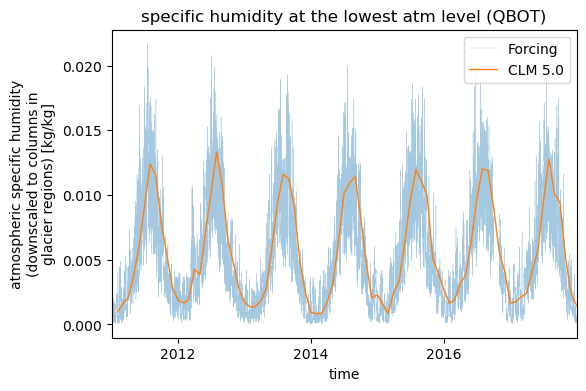

In [17]:
plot_forcing('QBOT', 'QBOT')

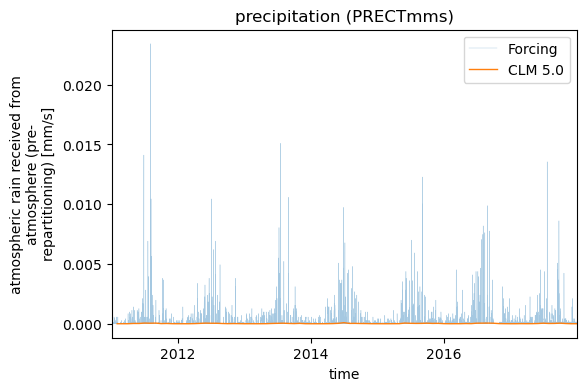

In [18]:
plot_forcing('PRECTmms', 'RAIN_FROM_ATM')

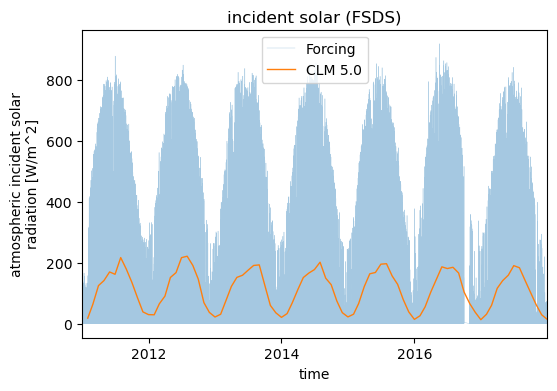

In [19]:
plot_forcing('FSDS', 'FSDS')

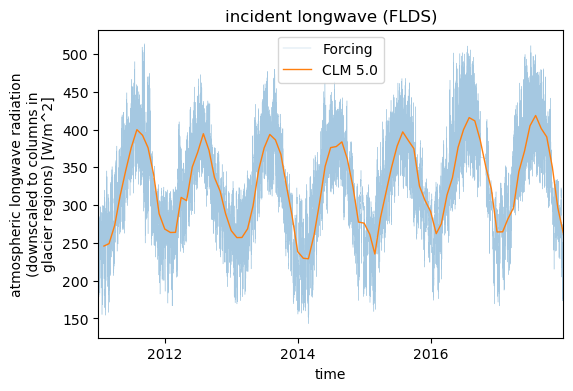

In [20]:
plot_forcing('FLDS', 'FLDS')

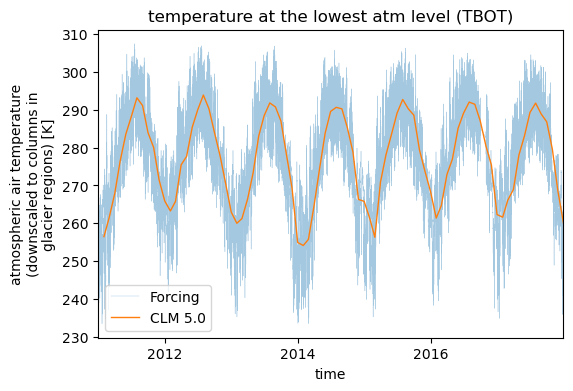

In [21]:
plot_forcing('TBOT', 'TBOT')

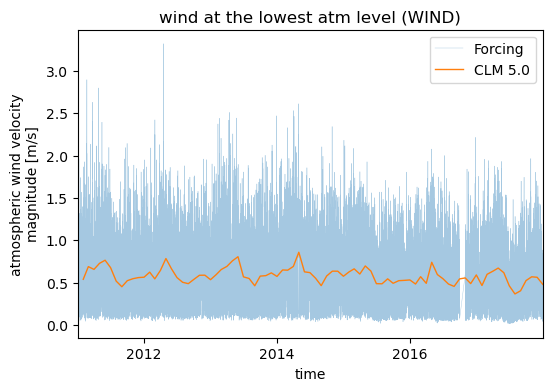

In [22]:
plot_forcing('WIND', 'WIND')

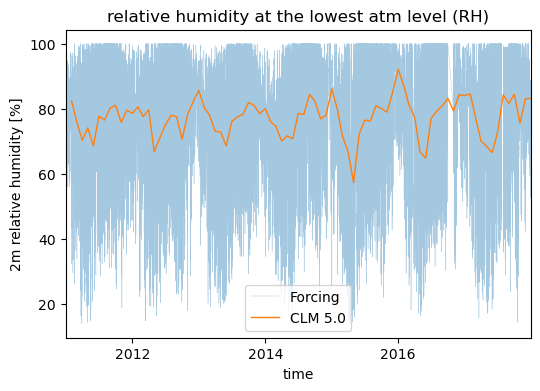

In [23]:
plot_forcing('RH', 'RH2M')

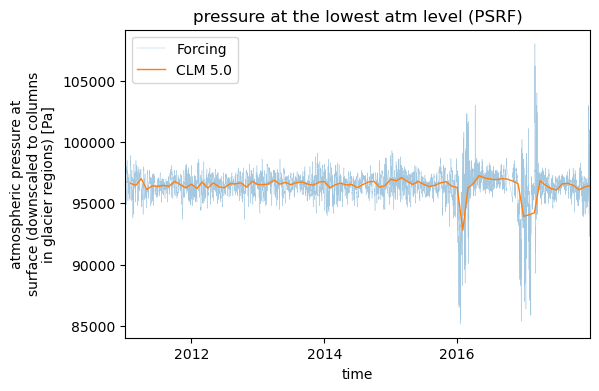

In [24]:
plot_forcing('PSRF', 'PBOT')